# Рекомендация тарифов

Предоставлены данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф. 


##### Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## 1. Открытие файла и изучение данных

In [33]:
import pandas as pd
import seaborn as sns, numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv('/datasets/users_behavior.csv')

In [7]:
df

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


## 2. Разбиение данных на выборки

In [9]:

df_train, df_test = train_test_split(df, test_size=0.2, random_state=12345)
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=12345)

Решено разделить общий датасет на три выборки по такой схеме:

обучающая - 60%

валтдационная - 20%

тестовая - 20%

Для этого я сначала отделила тестовую выборку от датасета, и затем разделила оставшийся датасет на 25 и 75% чтобы получить в итоге ращделение всего датасета на 60, 20 и 20%.

## 3. Исследование моделей

In [52]:
#определимся с целевым признаком, это будет столбец is_ultra, так как нам в задании нужно определить именно выбор тарифа
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra'] 

features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra'] 

features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']
 

In [53]:
#случайный лес
for estim in range(10, 100, 10):
    model = RandomForestClassifier(n_estimators=estim, random_state=12345, max_depth=10)
    model.fit(features_train, target_train)
    #model.fit(features_valid, target_valid)
    
    predictions_test = model.predict(features_test)
    predicted_valid = model.predict(features_valid)
    accur_score = accuracy_score(target_valid, predicted_valid, normalize=True)
    print("n_estimators =", estim, ":", accur_score)

n_estimators = 10 : 0.7900466562986003
n_estimators = 20 : 0.7962674961119751
n_estimators = 30 : 0.7916018662519441
n_estimators = 40 : 0.7962674961119751
n_estimators = 50 : 0.7978227060653188
n_estimators = 60 : 0.7916018662519441
n_estimators = 70 : 0.7962674961119751
n_estimators = 80 : 0.7947122861586314
n_estimators = 90 : 0.7931570762052877


In [54]:
#решающее дерево
for depth in range(1, 15):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    #model.fit(features_valid, target_valid)
    
    predictions_test = model.predict(features_test)
    predicted_valid = model.predict(features_valid)
    accur_score = accuracy_score(target_valid, predicted_valid, normalize=True)
    print("n_depth =", depth, ":", accur_score)

n_depth = 1 : 0.7387247278382582
n_depth = 2 : 0.7573872472783826
n_depth = 3 : 0.7651632970451011
n_depth = 4 : 0.7636080870917574
n_depth = 5 : 0.7589424572317263
n_depth = 6 : 0.7573872472783826
n_depth = 7 : 0.7744945567651633
n_depth = 8 : 0.7667185069984448
n_depth = 9 : 0.7620528771384136
n_depth = 10 : 0.7713841368584758
n_depth = 11 : 0.7589424572317263
n_depth = 12 : 0.7558320373250389
n_depth = 13 : 0.749611197511664
n_depth = 14 : 0.7573872472783826


 лучшие показатели качества модели демонстрируются при max_depth = 7

Решили построить две модели дерева решений и случайного леса. Здесь ставится задача классификации, так как тариф - это категориальный признак. Соответственно используем модели классификации. В начале создаем модель и обучаем ее на обучающей выборке, далее настраиваем гиперпараметры и проверяем точность на валидационной. Для проверки на тестовой выборке я решила использовать модель случайного леса, так как на ней в заданном мной диапазоне гиперпараметров был диапазон значений  с большей точностью, чем у другой модели.

## 4. Проверка модели на тестовой выборке

Теперь обучаем модель на тренировочных данных и проверяем на тестовой выборке. Решили на всякий случай проверить обе модели на подходящих гиперпараметрах, чтобы точно увидеть размер точности  и сравнить две модели.

In [55]:

model = DecisionTreeClassifier(random_state=12345, max_depth=7)
model.fit(features_train, target_train)

#accur = accuracy_score(target_valid, predicted_valid, normalize=True)     
#print("Accuracy:", accur(target_test, model.predict(features_test)))   
print(accuracy_score(target_test, model.predict(features_test)))   

0.7884914463452566


Нужно было выбрать значение 7, как предварительно было определено, исправила)

In [18]:

model = RandomForestClassifier(n_estimators=50, random_state=12345, max_depth=10)
model.fit(features_train, target_train)
    
#accur = accuracy_score(target_valid, predicted_valid, normalize=True)     
#print("Accuracy:", accur(target_test, model.predict(features_test)))   
print(accuracy_score(target_test, model.predict(features_test)))   


0.7993779160186625


В результате получилось, что  модель дерева решений работает с большей точностью (0.7993779160186625), значение, превышающее 0.75, что и требуется в задании. 

In [44]:
random_tests = []
model = RandomForestClassifier(n_estimators=50, max_depth=10)
for estim in range(500):
    
    model.fit(features_train, target_train)
    #print(accuracy_score(target_train, model.predict(features_train)))
    random_tests.append(accuracy_score(target_test, model.predict(features_test)))
     


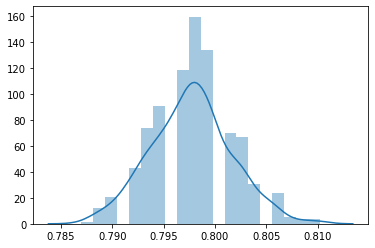

In [47]:
sns.distplot(random_tests, label = 'Accuracy' )
plt.show()

вот тут я попыталась построить график, показывающий диапазон значений при прежних параметрах в большом диапазоне, при этом random_state обучал их случайным образом. В целом получилось так, что точность по гистограмме стремится к 0.79, как и у меня в тестировании модели.




В результате работы мы создали модель машинного обучения, которая дает достаточный уровень точности. Для этого первичный датасет был разделен на обучающую - 60%, валтдационную - 20%  и тестовую - 20% выборки. Решено было создать две модели: дерева решений и случайного леса. В начале создаем модель и обучаем ее на обучающей выборке, далее настраиваем гиперпараметры и проверяем точность на валидационной. Для проверки на тестовой выборке я решила использовать модель случайного леса, так как на ней в заданном мной диапазоне гиперпараметров был диапазон значений  с большей точностью, чем у другой модели. Результаты проверки модели на тестовой выборке показали, что модель обладает точностью 0.799, что соответствует заявленным пороговым значениям. 